# Table of Contents
 <p>

In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
from pyseqlogo.pyseqlogo import draw_logo, setup_axis, draw_protein
from pyseqlogo.format_utils import read_alignment, calc_relative_information, format_matrix
from pyseqlogo.wigoperations import WigReader
from collections import defaultdict
from Bio import motifs

data = '../data/K562_MAFF_all_m_lcr_100.fa_archs.txt'
wig = WigReader('/media/dna/genomes/hg19/phastCons/hg19.100way.phastCons.bw')

Populating the interactive namespace from numpy and matplotlib


In [8]:
archlines = open(data).read().splitlines()

maxarch = max([int(x.split()[0]) for x in archlines])

archlist = defaultdict(list)
archcoords  = defaultdict(list)
for l in archlines:
    if len(l.split())>3:
        archlist[int(l.split()[0])-1] += [l.split()[-2]]
        strand = l.split()[3][:3].replace('(','').replace(')', '')
        
    else:
        archlist[int(l.split()[0])-1] += [l.split()[-1]]
        archcoords[int(l.split()[0])-1].append( l.split()[1])
    chrom, pos = l.split()[1].split(':')
    start, end = pos.split('-')
    archcoords[int(l.split()[0])-1].append( (chrom, int(start), int(end), strand))
    

In [9]:
phastcons_scores = {}
for index, coords in archcoords.iteritems():
    phastcons_scores[index] = wig.query(archcoords[index]).mean(axis=0)

In [10]:

for cluster_index in range(maxarch):
    fasta = ''
    cluster = archlist[cluster_index]
    for index, seq in enumerate(cluster):
        if 'N' not in seq:
            fasta += '>seq{}-{}\n{}\n'.format(cluster_index+1,index+1, seq)
    with open('../data/K562_MAFF_all_m_lcr_100.fa_archs.{}.fasta'.format(cluster_index), 'w') as f:
        f.write(fasta)

In [13]:
fasta = ''
for cluster_index, cluster in archlist.iteritems():
    for index, seq in enumerate(cluster):
        if 'N' not in seq:
            fasta += '>seq{}-{}\n{}\n'.format(cluster_index+1,index+1, seq)
        
    

In [14]:
with open('../data/K562_MAFF_all_m_lcr_100.fa_archs.fasta', 'w') as f:
    f.write(fasta)

/home/saket/anaconda2/lib/python2.7/site-packages/pyseqlogo-0.1.0-py2.7.egg/pyseqlogo/format_utils.py:101: RuntimeWarning: divide by zero encountered in log2
  shannon_entropy = [sum([-pfm[b][l] * np.nan_to_num(np.log2(pfm[b][l])) for b in bases]) for l in range(0, n)]
/home/saket/anaconda2/lib/python2.7/site-packages/pyseqlogo-0.1.0-py2.7.egg/pyseqlogo/format_utils.py:104: RuntimeWarning: divide by zero encountered in log2
  for b in bases]) for l in range(0, n)]


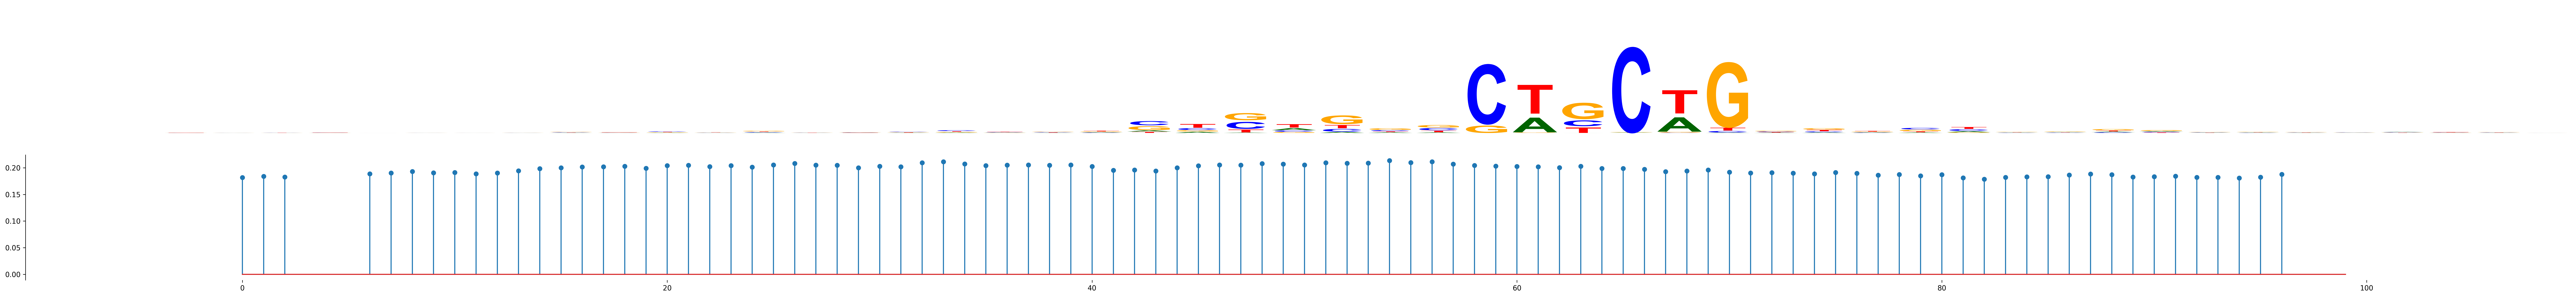

In [25]:
plt.rcParams['figure.dpi'] = 300

for cluster_index in range(maxarch):
    fig, axarr = draw_logo('../data/K562_MAFF_all_m_lcr_100.fa_archs.{}.fasta'.format(cluster_index), 
                           data_type='fasta', nrow=2, ncol=1, coordinate_type='data', axis)
    axarr[1,0].stem(phastcons_scores[cluster_index])
    fig.tight_layout()
    break

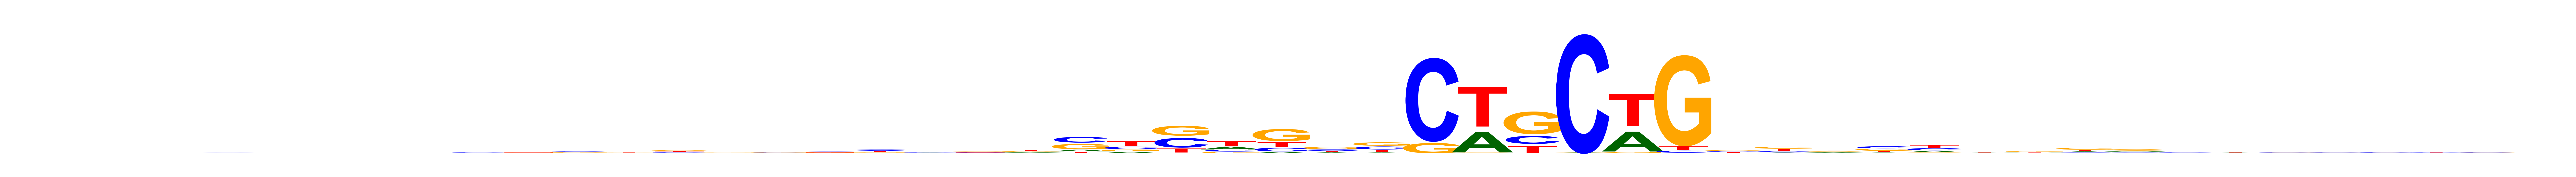

In [26]:
fig, axarr = draw_logo('../data/K562_MAFF_all_m_lcr_100.fa_archs.{}.fasta'.format(cluster_index), 
                       data_type='fasta', nrow=1, ncol=1, coordinate_type='data')
